# ***Capstone Module 3***

## **Business Problem Understanding**

##### **Context**

Kadaan pasar jual beli kendaraan bekas dalam hal ini mobil di Arab Saudi, terus mengalami peningkatan siginfikan, terutama pasca merebaknya virus Covd-19 yang menyebabkan guncangan di beberapa sektor ekonomi. Dikarenakan hal tersebut, pemerintah arab sempat membuat kebijakan untuk penaikan VAT sebesar 15% yang berakibat pada kenaikan harga mobil baru. Sedangkan 50% dari populasi Arab Saudi saat ini ditempati oleh penduduk dengan usia 30 tahun kebawah dengan pendapatan yang belum terlalu besar. karena itu mereka lebih memilih untuk membeli mobil bekas. Selain itu kebijakan pemerintah Arab yang memperbolehkan wanita menyetir juga memainkan peran dalam peningkatan ini.

Perkembangan penggunaan internet saat ini memiliki peranan penting dalam pembelian kendaraan bekas. 6 dari 10 warga di Arab Saudi, memilih pembelian kendaraan secara online. apalagi ditambah fakta kemudahan transaksi saat ini yang membuat konsumen merasa nyaman untuk end-to-end transaction secara daring. Hal ini mendukung menjamurnya pasar mobil bekas online kian menjamur.

##### **Problem Statement**
Didalam pasar mobil online, konsumen yang berperan sebagai penjual dan pembeli mungkin akan kesulitan menentukan patokan harga mobil yang mereka akan jual atau beli karena memang pasar mobil bekas tidak ada patokan pasti. Dengan data kondisi kendaraan yang mereka miliki atau kendaraan yang mereka cari penentuan harga akan lebih tergambar untuk menghindari pembelian dan penjualan yang *underprice* atau *overprice*

##### **Goals**
Berdasarkan penjelasan diatas, suatu perusahaan jual-beli mobil bekas online di Saudi ingin membangun suatu model sebagai alat prediksi konsumen mereka untuk benchmarking harga kendaraan bekas sesuai dengan fitur-fitur yang ada, guna menghindari kesalahan konsumen dalam menentukan harga, serta meningkatkan kenyamanan pengguna karena kebutuhan mereka sudah terakomodir untuk penentuan harga ini.


##### **Analytic Approach**
Untuk memenuhi tujuan dari perusahaan, kita akan melakukan analisis, apakah dari data ini memiliki pola keterkaitan antara fitur-fitur didalamnya guna membangun model prediksi harga mobil guna memudahkan serta kenyamanan pengguna untuk menghindari kesalahan memasang harga etika menjual atau membeli mobil


##### **Metric Evaluation**
Untuk evaluasi model prediksi harga mobil, metrik yang digunakan adalah RMSE, MAE, dan MAPE. RMSE (Root Mean Squared Error) adalah rata-rata dari akar kuadrat kesalahan, MAE (Mean Absolute Error) adalah rata-rata nilai absolut dari kesalahan, sedangkan MAPE (Mean Absolute Percentage Error) adalah rata-rata persentase kesalahan yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang diperoleh, semakin akurat model dalam memprediksi harga mobil berdasarkan fitur yang digunakan.



## **Data Understanding**

- Data ini berisi listing penjualan mobil bekas di Saudi Arabia.


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Type of used car |
| Region | Object | The region in which the used car was offered for sale |
| Make | Object | The company name |
| Gear_Type | Object | Transmission of car |
| Origin | Object | Origin of Used Car |
| Options| Object | options or Trim Type of Car |
| Year | INT | Manufacturing Year |
| Engine_Size | Float | The engine size of used car |
| Mileage | INT | Mileage of used car |
| Negotiable | Bool | True if the price is 0, that means it is negotiable |
|   Price| INT | Used car price |



### Import Library

In [751]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge ,Lasso, ElasticNet

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold


### Load Dataset

In [752]:
df = pd.read_csv('data_saudi_used_cars.csv')
df.head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000
8,Avalon,Riyadh,Toyota,Automatic,Saudi,Standard,2016,3.5,110864,False,81500
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0


In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


### **EDA**

In [754]:
# membuat variable yang memisahkan data numerikal dan kategorikal
numeric = ['Year','Engine_Size','Mileage','Price']
categorical = ['Type','Region','Make','Gear_Type','Options','Negotiable','Origin']
dataNumerical = df[numeric]
dataCategorical = df[categorical]

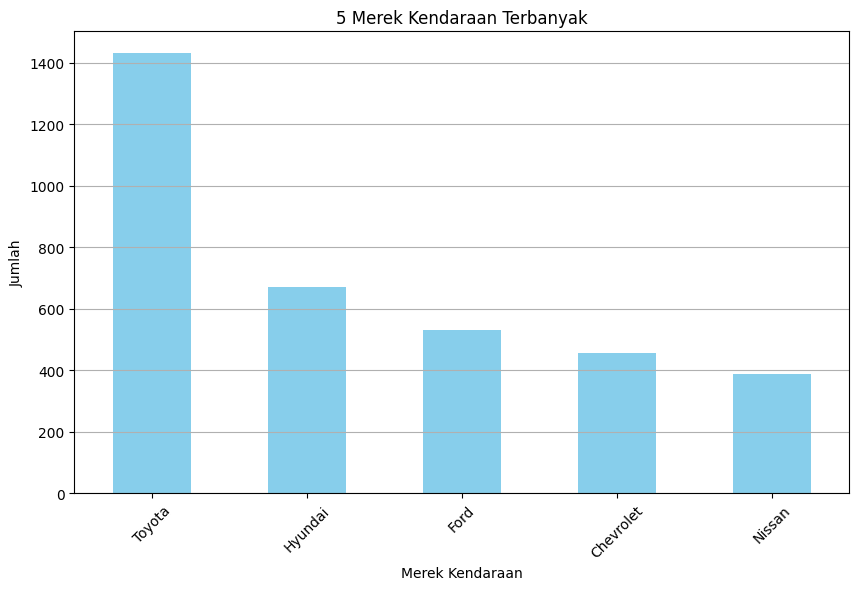

In [755]:
#Melihat top 5 merk dengan listing terbanyak
top_5_makes = df['Make'].value_counts().head(5)

# Visualisasi
plt.figure(figsize=(10, 6))
top_5_makes.plot(kind='bar', color='skyblue')
plt.title('5 Merek Kendaraan Terbanyak')
plt.xlabel('Merek Kendaraan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Menampilkan plot
plt.show()

Dari data ini diambil 5 teratas dengan listing terbanyak. Toyota menempati tempat dengan jumlah terbanyak disusul oleh Hyundai dengen perbedaan yang cukup signifikan

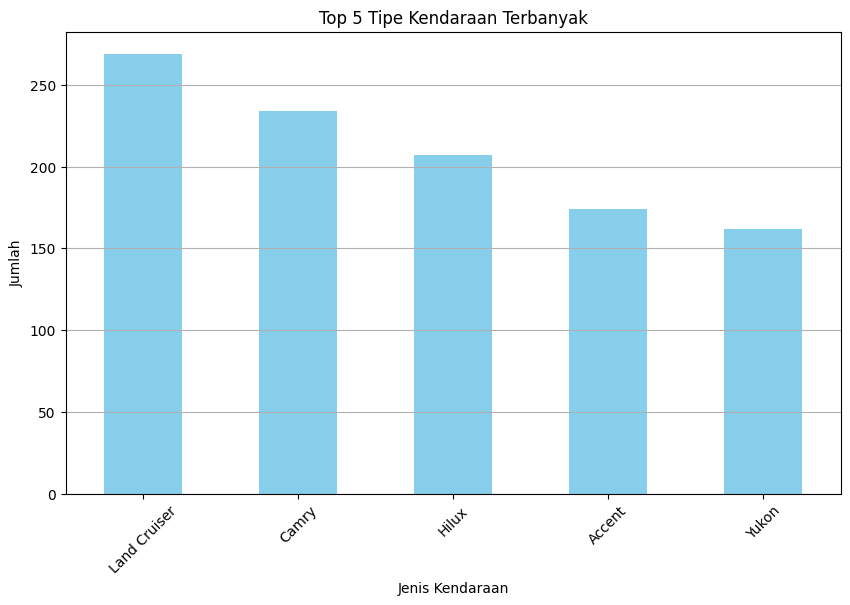

In [756]:
top5Types = df['Type'].value_counts().head(5)

# Visualisasi
plt.figure(figsize=(10, 6))
top5Types.plot(kind='bar', color='skyblue')
plt.title('Top 5 Tipe Kendaraan Terbanyak')
plt.xlabel('Jenis Kendaraan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Menampilkan plot
plt.show()

Berkaitan dengan grafik sebelumnya, 5 tipe model terbanyak di Saudi tetap didominasi oleh Toyota dengan 3 model dan disusul oleh Hyundai dan GMC, hal ini menegaskan fakta bahwa Toyota adalah pabrikan mobil terlaris di Saudi karena memang terkenal akan reputasi sebagai Affordable and Reliable car.

In [757]:
# Membuat fungsi untuk visualisasi
def cekCategorical(column):
    sns.countplot(x = dataCategorical[column])
    plt.show()


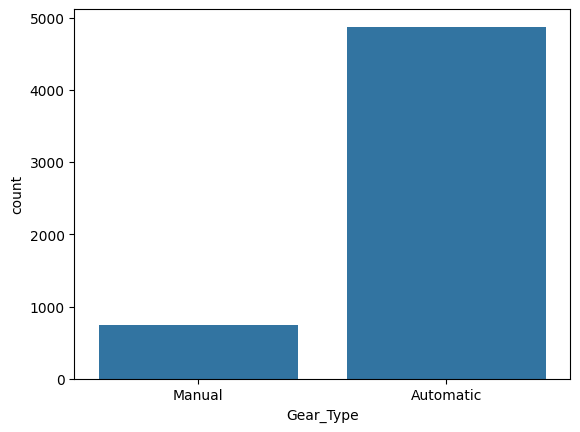

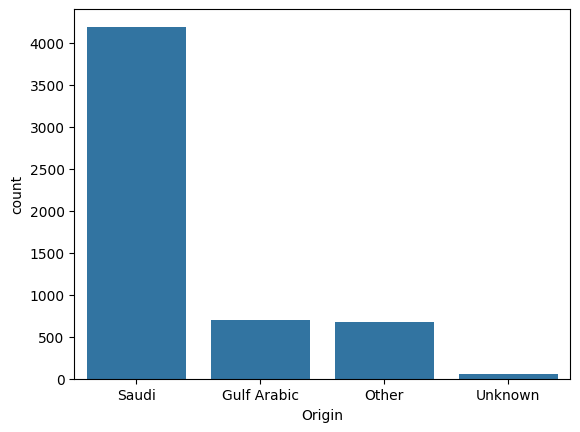

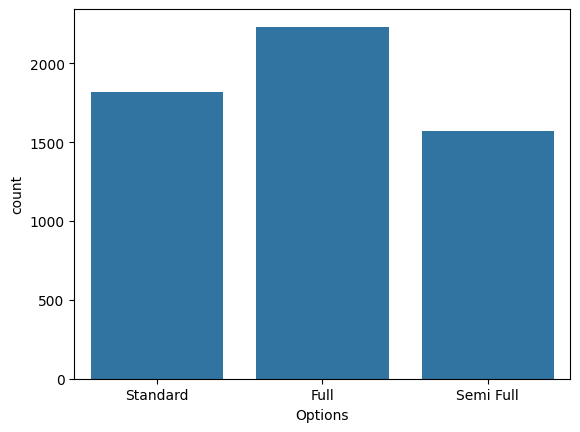

In [758]:
cekCategorical('Gear_Type')
cekCategorical('Origin')
cekCategorical('Options')

Dari ketiga grafik diatas, dapat disimpulkan bahwa:
- Transmisi Automatic adalah pilihan terbanyak
- Mobil-mobil yang ada di listing, mayoritas berasal dari  Saudi
- Optional atau disebut juga dengan Trim, Full Options atau Optional terlengkap menjadi pilihan terbanyak juga

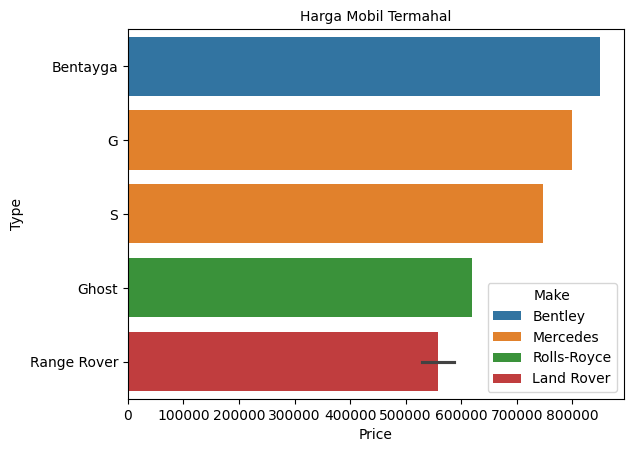

In [759]:
sns.barplot(
    x='Price',
    y='Type',
    hue='Make',
    data=df.nlargest(8, 'Price')

)
plt.title ('Harga Mobil Termahal', size = 10)
plt.show()

In [760]:
expensiveCars = df.sort_values(by='Price', ascending=False).head(10)
expensiveCars


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,False,850000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,False,800000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,False,748000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,False,620000
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,False,599000
3561,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2020,5.0,26000,False,575000
3105,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2020,5.0,36000,False,540000
2862,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2019,5.6,36000,False,520000
2504,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2020,3.0,11500,False,510000
3041,Camargue,Dammam,Rolls-Royce,Automatic,Saudi,Full,1990,6.7,5000,False,500000


In [761]:
df[df['Type'] == 'Bentayga'].shape[0]

1

## **Data Preparation**

In [762]:
# Membuat salinan Dataframe
data = df.copy()


In [763]:
listItem = []

for col in data.columns:
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col]))*100, 2),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

dataModelDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dataModelDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[Land Cruiser Pickup, Wingle]"
1,Region,object,0,0.0,27,"[Jazan, Yanbu]"
2,Make,object,0,0.0,58,"[Genesis, Isuzu]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Saudi, Unknown]"
5,Options,object,0,0.0,3,"[Semi Full, Standard]"
6,Year,int64,0,0.0,50,"[1997, 2005]"
7,Engine_Size,float64,0,0.0,71,"[6.1, 4.9]"
8,Mileage,int64,0,0.0,1716,"[292764, 13200]"
9,Negotiable,bool,0,0.0,2,"[True, False]"


Dari tampilan data diatas dapat dilihat Dataset ini tidak memiliki kolom Null, namun ada satu komponen yang dirasa bisa dilakukan perubahan.Yaitu kolom **Origin** dimana masih ada nilai **Unknown**, padahal di kolom tersebur ada nilai **Other** yang seharusnya bisa digabungkan.

**Merubah Nilai Unknown Dalam Fitur Origin**

In [764]:
regionOtherOrigin = df[df['Origin'] == 'Other'].groupby('Region').size().reset_index(name='Count')
regionOtherOrigin

,Region,Count
0,Abha,13
1,Al-Ahsa,39
2,Al-Baha,7
3,Al-Jouf,3
4,Al-Medina,28
5,Al-Namas,1
6,Arar,1
7,Aseer,23
8,Besha,3
9,Dammam,132


In [765]:
regionOtherUnknown = df[df['Origin'] == 'Unknown'].groupby('Region').size().reset_index(name='Count')
regionOtherUnknown

,Region,Count
0,Abha,3
1,Al-Ahsa,3
2,Al-Baha,1
3,Al-Jouf,1
4,Al-Medina,4
5,Aseer,1
6,Dammam,3
7,Jeddah,4
8,Jubail,3
9,Qassim,9


Penjabaran diatas adalah penegasan untuk merubah Unknown menjadi Other, karena banyak Region pada Origin Unknown ada dalam Other

In [766]:
# Merubah Origin Unknown menjadi Other
data['Origin'] = data['Origin'].replace('Unknown', 'Other')

**Drop Irrelevant  dan Harga 0**

In [767]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5624.0,2014.101885,5.791606,1963.0,2012.0,2016.0,2018.0,2022.0
Engine_Size,5624.0,3.295430,1.515108,1.0,2.0,3.0,4.5,9.0
Mileage,5624.0,150923.375000,382835.963005,100.0,38000.0,103000.0,196000.0,20000000.0
Price,5624.0,53074.058144,70155.340614,0.0,0.0,36500.0,72932.5,850000.0


Selanjutnya dari deskriptif statistik diatas, bisa kita lihat ada kolom dengan nilai 0 yaitu **Price** dan merunut pada deskripsi awal pada dataset ini yang menyebutkan:

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Negotiable | Bool | True if the price is 0, that means it is negotiable |

Maka dapat disimpulkan bahwa kolom **Negotiable** yang berkorelasi dengan harga 0 akan di drop.
mengingat harga kendaraan yang bernilai 0 dalam dataset dapat mempengaruhi performa model regresi secara signifikan. Nilai harga yang nol tidak hanya mengindikasikan data yang hilang atau tidak valid, tetapi juga dapat menyebabkan model menjadi bias dan menghasilkan prediksi yang tidak akurat.

In [768]:
#menghapus price 0
carsData = data['Price'] > 0
data = data[carsData]

#menghapus kolom Negotiable
data = data.drop(columns = ['Negotiable'])
data.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


In [769]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3827.0,2014.853149,5.109657,1963.0,2013.0,2016.0,2018.0,2021.0
Engine_Size,3827.0,3.180141,1.458724,1.0,2.0,2.7,4.0,9.0
Mileage,3827.0,142620.383068,378258.447865,100.0,48000.0,103000.0,183000.0,20000000.0
Price,3827.0,77995.428011,72726.709078,1.0,35000.0,58000.0,94000.0,850000.0


Data head diatas menunjukan sudah tidak ada lagi kolom **Negotiable** dan Harga 0

**Melakukan Limitasi Pada Price Sesuai Domain Knowledge**

Setelah dilakukan research ke beberapa platform jual beli di arab, seperti **YallaMotor.com** dan **Truecar.com,** mayoritas harga jual dimulai dari 5000SAR atau setara dengan Rp. 22.000.000 walaupun tergolong murah tapi listing harga tersebut masih sangat banyak, maka penetapan harga tersebut akan menjadi limitasi untuk menghandle anomali data yang kita lihat ada nilai 1.0 dalam harga.

Dan untuk harga tertinggi, walaupun akan dideteksi sebagai Outliers, namun tidak akan dilakukan pembersihan. Hasil dari EDA harga menunjukan bahwa harga mobil termahal memang dimiliki oleh brand-brand mobil yang tergolong mewah dan memang banyak dijual, oleh karena itu saya ingin untuk tipe-tipe mobil tersebut masih ada didalam range prediksi model kita nanti

In [770]:
carsData = data['Price'] >= 5000
data = data[carsData]

**CHECK CORRELATION**

In [771]:
#Impor Library
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [772]:
# Membuat copy data sementara untuk label encoding sebelum cek korelasi
data_new = data.copy()

In [773]:
# Mengubah data kategorikal menjadi data numerik menggunakan LabelEncoder
label_encoder = preprocessing.LabelEncoder()
data_new['Type']= label_encoder.fit_transform(data_new['Type'])
data_new['Region']= label_encoder.fit_transform(data_new['Region'])
data_new['Make']= label_encoder.fit_transform(data_new['Make'])
data_new['Gear_Type']= label_encoder.fit_transform(data_new['Gear_Type'])
data_new['Origin']= label_encoder.fit_transform(data_new['Origin'])
data_new['Options']= label_encoder.fit_transform(data_new['Options'])
data_new.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,312,20,19,0,2,0,2014,8.0,80000,120000
2,240,20,33,0,0,0,2015,5.0,140000,260000
3,211,10,32,0,2,1,2015,2.4,220000,42000
5,59,0,40,0,2,1,2019,2.0,25000,58000
6,73,20,47,0,2,0,2012,4.8,189000,85000


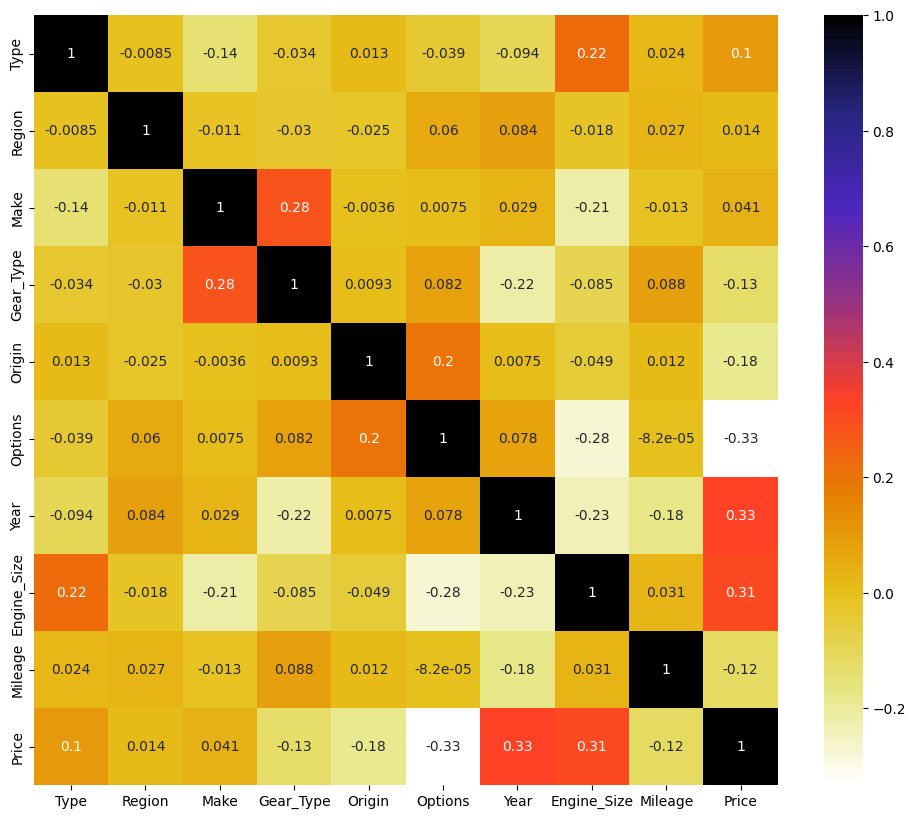

In [774]:
cor = data_new.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

Dari cek korelasi diatas dapat disimpulkan:

- Tahun (Year): Memiliki korelasi positif yang cukup kuat (0.31) dengan harga. Ini menunjukkan bahwa mobil yang lebih baru cenderung memiliki harga yang    lebih tinggi.
- Ukuran Mesin (Engine_Size): Memiliki korelasi positif yang signifikan (0.31) dengan harga. Kendaraan dengan kapasitas mesin yang lebih besar cenderung lebih mahal.
- Opsi (Options): Memiliki korelasi negatif (-0.33) dengan harga. Mobil dengan opsi standar cenderung lebih murah.
- Jarak Tempuh (Mileage): Memiliki korelasi negatif (-0.27) dengan harga. Mobil dengan jarak tempuh lebih sedikit cenderung lebih mahal.
- Tipe Transmisi (Gear_Type): Korelasi negatif (-0.12) dengan harga, menunjukkan bahwa transmisi otomatis (AT) cenderung lebih mahal daripada transmisi manual (MT).

**Check Outliers**

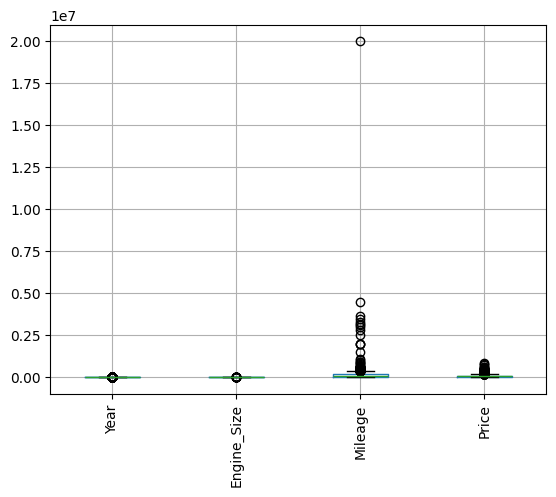

In [775]:
# Visual Boxplot untuk melihat outliers numerik
data.boxplot(rot=90);

Grafik boxplot di atas menunjukkan distribusi variabel Year, Engine_Size, Mileage, dan Price. Variabel Year dan Engine_Size memiliki distribusi yang seragam tanpa outlier yang signifikan, menunjukkan stabilitas dalam rentang tahun pembuatan dan ukuran mesin kendaraan. Namun, variabel Mileage dan Price menunjukkan adanya outlier signifikan dengan banyak kendaraan yang memiliki jarak tempuh dan harga yang jauh melampaui rentang normal. Outlier-outlier ini bisa mempengaruhi analisis dan akurasi model prediksi, sehingga penanganan khusus mungkin diperlukan untuk meningkatkan kualitas prediksi.

In [776]:
def outliersCek(column):
# Menghitung Q1 (quartile 1) dan Q3 (quartile 3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Menghitung IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengidentifikasi outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers_sorted = outliers.sort_values(by=column, ascending=False)


    # Menampilkan outliers
    return outliers[column]


In [777]:
outliers = pd.DataFrame()
data.columns
columns = []
countOutliers = []
colOutliers = []
for column in numeric:
    if len(outliersCek(column)) != 0:
        columns.append(column)
        countOutliers.append(len(outliersCek(column)))
        colOutliers.append(outliersCek(column).to_list())
outliers['Kolom'] = columns
outliers['Jumlah_outliers'] = countOutliers
outliers['Outliers'] = colOutliers

outliers

,Kolom,Jumlah_outliers,Outliers
0,Year,180,"[2002, 2001, 1986, 1999, 1995, 2003, 2005, 200..."
1,Engine_Size,30,"[8.0, 9.0, 8.8, 9.0, 7.5, 8.0, 7.5, 8.0, 8.0, ..."
2,Mileage,129,"[550000, 500000, 2000000, 530500, 487100, 3880..."
3,Price,259,"[260000, 200000, 265000, 230000, 225000, 33000..."


In [778]:
def cekAnomali(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'lower bound: {limit_bawah}')
    print(f'upper bound: {limit_atas}')

In [779]:
cekAnomali(data['Year'])

IQR: 5.0
lower bound: 2005.5
upper bound: 2025.5


In [780]:
cekAnomali(data['Mileage'])

IQR: 135000.0
lower bound: -153500.0
upper bound: 386500.0


In [781]:
cekAnomali(data['Engine_Size'])

IQR: 2.0
lower bound: -1.0
upper bound: 7.0


In [782]:
cekAnomali(data['Price'])

IQR: 59000.0
lower bound: -52500.0
upper bound: 183500.0


Untuk selanjutnya outliers akan kami coba kurangi dengan beberapa cara

**Outliers Handling**

ENGINE SIZE

In [783]:
data['Engine_Size'].describe()

count    3759.000000
mean        3.186619
std         1.460392
min         1.000000
25%         2.000000
50%         2.700000
75%         4.000000
max         9.000000
Name: Engine_Size, dtype: float64

Dilihat dari MAX Engine_Size ada nila 9.0 yang dimana apabila digabungkan dengan business domain, tidak ada mobil penumpang dengan kapasitas 9000cc, bahkan untuk diatas 7000cc hampir tidak ada, atas pertimbangan itu, untuk Outliers di Engine_Size akan ditanganin dengan cara:
- Merubah Engine_Size merujuk pada Type mobil sama yang nilainya bukan Outliers

In [784]:
# Grouping modus Engine_Size berdasarkan type
type_engine = data.groupby(['Type'])['Engine_Size'].agg(pd.Series.mode).to_frame()
type_engine = pd.DataFrame(type_engine)
type_engine.reset_index(inplace=True)
type_engine.rename(columns={"index": "Type"},inplace=True)

In [785]:
listOutliers = outliersCek('Engine_Size').index.to_list()
Filter_df = data.index.isin(listOutliers)
# mengganti nilai outlier engine size dengan nan value
data['Engine_Size'][Filter_df] = np.nan

# Mengganti nan dengan modus per type
for i in data.index:
    if np.isnan(data['Engine_Size'][i]):
        tp = type_engine[type_engine['Type']==data['Type'][i]]['Engine_Size']
        if isinstance(tp.values[0],np.ndarray):
            eng = tp.values[0][0]
        else:
            eng = tp.values[0]
        data.loc[i, 'Engine_Size'] = eng



In [786]:
outliersCek('Engine_Size')

883    8.0
Name: Engine_Size, dtype: float64

Setelah pembersihan, masih ada satu kolom yang masih bernilai Outliers

In [787]:
data.loc[883]

Type            Cadillac
Region            Riyadh
Make             Classic
Gear_Type      Automatic
Origin             Saudi
Options             Full
Year                1995
Engine_Size          8.0
Mileage              119
Price              25000
Name: 883, dtype: object

In [788]:
data[data['Make'] == 'Classic']['Make'].count()

1

Jika dilihat, Engine_Size yang masih outliers, tidak memiliki Type yang sama atau hanya satu, sehingga data tersebut tidak terganti.
mengingat hanya satu baris, maka akan diexcludekan dari data.

In [789]:
data.drop(index=883, inplace=True)

MILEAGE



In [790]:
data['Mileage'].describe()

count    3.758000e+03
mean     1.439184e+05
std      3.814340e+05
min      1.000000e+02
25%      4.900000e+04
50%      1.042445e+05
75%      1.840000e+05
max      2.000000e+07
Name: Mileage, dtype: float64

Jika dilihat pada Max Mileage, ada baris yang bernilai sampai 20.000.000 Mileage yang hampir dipastikan sangat jarang terjadi, walaupun setelah research banyak listing dengan kilometer sampai jutaan, namun dalam data ini nilai yang lebih dari median sekitar 175 data. berupaya meminimalisir pengurangan data, maka outliers pada kolom Mileage akan diubah dengan mengambil median 

In [791]:
# Menghitung IQR untuk Mileage
Q1 = data['Mileage'].quantile(0.25)
Q3 = data['Mileage'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas untuk outlier
upper_bound = Q3 + 1.5 * IQR

# Mengganti outliers yang berada di atas upper bound dengan median
median_mileage = data['Mileage'].median()

data['Mileage'] = np.where(data['Mileage'] > upper_bound, median_mileage, data['Mileage'])

#### YEAR

In [792]:
data['Year'].describe()

count    3758.000000
mean     2014.808941
std         5.083409
min      1963.000000
25%      2013.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: Year, dtype: float64

Jika melihat tahun tertua mobil dalam listing, ada di 1963 dan yang termuda ada di 2022, hal ini tentu saja membuat kolom Year menjadi ada Outliers. Jika dilihat berdasarkan Domain Knowledge, pembatasan usia kendaraan impor di Arab dibatasi pada usia mobil 5 tahun, namun bukan berarti lebih dari itu tidak bisa. Usia lebih dari 5 tahun tetap bisa digunakan dengan regulasi cek tahunan yang lebih ketat. **Disisi lain apabila data ini dibatasi dengan  tahun, akan memangkas jumlah data yang cukup banyak dan menyebabkan kurang optimalnya Model kita nanti.**

### MELAKUKAN LIMITASI PADA TAHUN

Pertimbangan selanjutnya adalah melimitasi tahun kendaraan berdasarkan kategori mobil, yaitu Classic. Berdasarkan research dari lallisandhiggins.com, mobil dapat dikatakan classic setelah berumur 20 tahun. Dan juga ditambah untuk prediksi pasar mobil classic cenderung lebih tidak memiliki pola, tergantung pada kondisi yang lebih sulit diidentifikasi melalui listing online. Oleh karena itu dalam Model ini akan ada limitasi untuk usia kendaraan, diatas 20 tahun.

In [793]:
data = data[(data['Year'] >= 2002)]

In [794]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3663.0,2015.339339,3.747900,2002.0,2014.0,2016.0,2018.0,2021.0
Engine_Size,3663.0,3.145591,1.397146,1.0,2.0,2.7,4.0,7.0
Mileage,3663.0,117588.128856,90063.625417,100.0,50000.0,104000.0,170000.0,384000.0
Price,3663.0,80649.146328,72604.394431,5000.0,38000.0,60000.0,95000.0,850000.0


#### CLEAN DATA

In [795]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3663.0,2015.339339,3.747900,2002.0,2014.0,2016.0,2018.0,2021.0
Engine_Size,3663.0,3.145591,1.397146,1.0,2.0,2.7,4.0,7.0
Mileage,3663.0,117588.128856,90063.625417,100.0,50000.0,104000.0,170000.0,384000.0
Price,3663.0,80649.146328,72604.394431,5000.0,38000.0,60000.0,95000.0,850000.0


In [796]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3663 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3663 non-null   object 
 1   Region       3663 non-null   object 
 2   Make         3663 non-null   object 
 3   Gear_Type    3663 non-null   object 
 4   Origin       3663 non-null   object 
 5   Options      3663 non-null   object 
 6   Year         3663 non-null   int64  
 7   Engine_Size  3663 non-null   float64
 8   Mileage      3663 non-null   float64
 9   Price        3663 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 314.8+ KB


Setelah melakukan beberapa step **Data Reprocessing** untuk menangani anomali dan outliers bentuk data dari yang sebelumnya 5642 baris sekarang ada 3663. Selanjutnya data ini akan memasuki tahap selanjutnya yaitu Modeling

## **MODELING**

### ENCODING

Sebelum masuk ke tahap modeling, kita akan melakukanEncoding terlebih dahulu, agar fitur-fitur kategorikal berubah menjadi numerial dan dapat digunakan dalam model kita selanjutnya

In [797]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['Gear_Type', 'Origin', 'Options']),
    ('Binary', ce.BinaryEncoder(), ['Type', 'Region', 'Make'])
], remainder='passthrough')

In [798]:
#carsData = pd.DataFrame(transformer.fit_transform(data),columns=transformer.get_feature_names_out())
#carsData.head()

### SPLITTING DATA

Selanjutnya kita akan memisahkan data sebagai data latih dan data tes, dengan proporsi 70:30

In [799]:
from sklearn.model_selection import train_test_split

In [800]:
carsData = data.copy()

In [801]:
#Memisahkan Target dengan feature
y = carsData['Price']
X = carsData.drop(['Price'],axis=1)


In [802]:
data_train, data_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [803]:
data_train.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
1450,Yaris,Jeddah,Toyota,Automatic,Saudi,Semi Full,2017,1.2,82000.0
723,FJ,Dammam,Toyota,Automatic,Saudi,Semi Full,2014,4.0,199000.0
5421,Corolla,Al-Ahsa,Toyota,Automatic,Gulf Arabic,Full,2014,1.6,197.0
525,CX5,Riyadh,Mazda,Automatic,Saudi,Full,2019,2.5,33000.0
3064,C,Jeddah,Mercedes,Automatic,Saudi,Full,2014,1.8,148925.0


### BENCHMARKING DENGAN 7 MODEL

In [804]:
#model yang dipakai
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
lasso = Lasso(random_state=1)
ridge = Ridge(random_state=1)
elas = ElasticNet(random_state=1)


log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(ridge,func=np.log, inverse_func=np.exp)
log_elas = TransformedTargetRegressor(elas,func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

models = [log_lr, log_knn, log_rf, log_xgb,log_lasso, log_ridge,log_elas]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        data_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        data_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        data_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())


[-48867.21396908 -50279.0130137  -48417.55642824 -46946.03188791
 -42998.52275278] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-26375.50232866 -25201.33079541 -25561.34856669 -23005.09436667
 -24832.77270488] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.36058457 -0.32258319 -0.31298805 -0.30052899 -0.32267912] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-50499.21942822 -53148.86522729 -52092.01541945 -45558.54204582
 -41856.50453317] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-24890.88329074 -26485.64466759 -27884.39503926 -25171.65767044
 -25004.18037975] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [805]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'Lasso Regressor','Ridge Regressor','ElasticNet'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-47501.667610,2490.151053,-24995.209752,1118.494674,-0.323873,0.020071
1,KNN Regressor,-48631.029331,4271.153579,-25887.352210,1151.633222,-0.414051,0.013905
2,RandomForest Regressor,-36218.850521,4333.320493,-16854.830456,845.805889,-0.221134,0.011742
3,XGBoost Regressor,-35644.942009,4062.624009,-16593.545598,868.019937,-0.217737,0.007735
4,Lasso Regressor,-76811.200549,1480.629848,-44437.696997,1015.664734,-0.688950,0.021589
5,Ridge Regressor,-47420.172724,2417.016213,-24887.875130,970.624051,-0.322325,0.017300
6,ElasticNet,-76811.200549,1480.629848,-44437.696997,1015.664734,-0.688950,0.021589


- Evaluasi hasil dari 7 model di atas menunjukkan bahwa terdapat perbedaan signifikan antara nilai RMSE dan MAE. Hal ini terjadi karena RMSE mengkuadratkan nilai residual sebelum menghitung rata-rata, sehingga memberikan bobot yang lebih besar pada kesalahan yang besar. Dalam memilih model yang akan digunakan, kita perlu mempertimbangkan nilai RMSE, MAE, dan MAPE terendah.
- XGBoost Regressor menunjukkan kinerja terbaik dengan kesalahan prediksi yang paling rendah di semua metrik, yaitu RMSE sebesar -35,978.62, MAE sebesar 16,764.41, dan MAPE sebesar -0.214142. 
- Model RandomForest Regressor juga menunjukkan kinerja yang baik namun sedikit di bawah XGBoost
- Sebagai tambahan referensi model kita akan menambahan satu model ketahap selanjutnya selain XGBoost dan RandomForrest, yaitu KNN. Hal ini dikarenakan walau KNN tidak memiliki nilai yang baik, namun KNN memiliki kelebihan mudah diimplementasi dan memiliki parameter Hypertuning yang sedikit. Jadi dirasa tidak salah untuk dicoba

Source: https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/

### PREDIKSI DATA TEST 3 MODEL

Berdasarkan Data Test

In [806]:
# 3 model terbaik dengan data test
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1),
    'KNN': KNeighborsRegressor() }
score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(data_train, y_train)
    y_pred = model.predict(data_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

ScoreBeforeTuning_Test = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
ScoreBeforeTuning_Test


,RMSE,MAE,MAPE
XGB,31762.706365,17924.906560,0.291621
RandomForest,34585.471552,19069.960343,0.312776
KNN,42824.484236,26048.123567,0.532330


Berdasarkan dari data test XGB lebih baik dari 3 model lainnya. Namun karena model ini bersifat research, selanjutnya akan dilakukan Hyperparameter tuning dengan tetap menggunakan ketiga model ini 

### **HYPERPARAMETER TUNING**

Kita akan melakukan Hyperparameter Tuning kepada 3 model ini dengan mengambil referensi dari:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

### HYPERPARAMETER TUNING UNTUK KNN

In [807]:
# KNN Tuning

# Jumlah tetangga terdekat yang akan digunakan dalam prediksi
n_neighbors = np.arange(1, 20)

# Metode untuk memberi bobot pada tetangga. 
weights = np.array(['uniform','distance'])

# Algoritma yang digunakan untuk menghitung tetangga terdekat
algorithm = np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])

# Ukuran daun untuk algoritma BallTree atau KDTree.
leaf_size = np.arange(1, 100)

# Hyperparam space XGboost
hyperparam_space_knn = {
    'model__n_neighbors': n_neighbors,
    'model__weights': weights,
    'model__algorithm': algorithm,
    'model__leaf_size': leaf_size,

}

In [808]:
# BenchmarkKNN
knn = KNeighborsRegressor()

# Membuat algorithm chains
estimator_knn = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', knn)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_knn = RandomizedSearchCV(
    estimator_knn,
    param_distributions = hyperparam_space_knn,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', 
    random_state = 1  )

In [809]:
# Fitting data training untuk mencari parameter terbaik KNN
random_knn.fit(data_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('scaler', StandardScaler()),
                                             ('model', KNeighborsRegressor())]),
                   n_it...
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'model__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'model__weights': array(['uniform', 'distance'], dtype='<U8')},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [810]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_knn.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__weights,param_model__n_neighbors,param_model__leaf_size,param_model__algorithm,params,split0_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
6,0.078497,0.012432,0.193540,0.024209,distance,12,8,kd_tree,"{'model__weights': 'distance', 'model__n_neigh...",-48614.776868,...,1134.364885,16,-0.501319,-0.509184,-0.498519,-0.509457,-0.500576,-0.503811,0.004592,25
0,0.061157,0.005024,0.142502,0.003135,distance,6,55,brute,"{'model__weights': 'distance', 'model__n_neigh...",-50957.846953,...,1348.589398,10,-0.496547,-0.475774,-0.448978,-0.466517,-0.469943,-0.471552,0.015363,13
5,0.054085,0.004114,0.070297,0.004220,distance,6,91,kd_tree,"{'model__weights': 'distance', 'model__n_neigh...",-50958.235163,...,1348.555807,11,-0.496554,-0.475774,-0.448978,-0.466517,-0.469943,-0.471553,0.015365,14
49,0.043171,0.003934,0.023624,0.001397,distance,7,12,auto,"{'model__weights': 'distance', 'model__n_neigh...",-50618.964146,...,1280.504741,9,-0.492501,-0.477219,-0.457210,-0.476744,-0.481217,-0.476978,0.011400,16
28,0.060152,0.004235,0.096147,0.010195,distance,10,17,kd_tree,"{'model__weights': 'distance', 'model__n_neigh...",-49500.536205,...,1198.667546,15,-0.495735,-0.489420,-0.489179,-0.496402,-0.501390,-0.494425,0.004620,20


In [811]:
print('KNN')
print('Best_score:', random_knn.best_score_)
print('Best_params:', random_knn.best_params_)

KNN
Best_score: -47035.19638357462
Best_params: {'model__weights': 'distance', 'model__n_neighbors': 12, 'model__leaf_size': 8, 'model__algorithm': 'kd_tree'}


Hasil KNN setelah tuning dengan data test

In [812]:


# Define model terhadap estimator terbaik
knn_tuning = random_knn.best_estimator_

# Fitting model
knn_tuning.fit(data_train, y_train)
#model.fit(data_train,y_train)

# Predict test set
y_pred_knn_tuning_test = knn_tuning.predict(data_test)
#y_pred_knn_tuning_test = model.predict(data_test)
# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_knn_tuning = np.sqrt(mean_squared_error(y_test, y_pred_knn_tuning_test))
mae_knn_tuning = mean_absolute_error(y_test, y_pred_knn_tuning_test)
mape_knn_tuning = mean_absolute_percentage_error(y_test, y_pred_knn_tuning_test)

scoreAfterTuningKNNTest = pd.DataFrame({'RMSE': rmse_knn_tuning, 'MAE': mae_knn_tuning, 'MAPE': mape_knn_tuning}, index={'KNN':10})
scoreAfterTuningKNNTest

,RMSE,MAE,MAPE
KNN,38905.780585,23920.912516,0.531159


### HYPERPARAMETER TUNING UNTUK XGBOOST

In [813]:
# Kedalaman pohon
max_depth = list(np.arange(1, 8))

# Learning rate
learning_rate = np.arange(0.01,1,0.01)

# Jumlah pohon
n_estimators = list(np.arange(100, 200,300))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

reg_alpha = list(np.logspace(-3, 1, 10)) + [0] 

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [814]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=42, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [815]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(data_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0, 0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [816]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
24,0.188726,0.007779,0.019459,0.001697,0.9,0.002783,100,6,0.09,3,...,834.480539,1,-0.232196,-0.264434,-0.271272,-0.250639,-0.243026,-0.252314,0.014143,1
8,0.139637,0.004417,0.021785,0.001833,0.6,0.059948,100,5,0.24,6,...,951.025820,4,-0.261027,-0.325324,-0.350234,-0.299242,-0.265517,-0.300268,0.034272,4
12,0.243683,0.011433,0.022969,0.002270,0.6,0.166810,100,7,0.22,7,...,836.111067,3,-0.260034,-0.298310,-0.295077,-0.266230,-0.268597,-0.277650,0.015832,2
39,0.235767,0.008452,0.019857,0.001939,0.6,3.593814,100,7,0.19,5,...,717.137209,2,-0.257138,-0.291920,-0.319850,-0.276559,-0.260601,-0.281214,0.022950,3
44,0.156031,0.010269,0.023483,0.002324,0.5,1.291550,100,4,0.19,6,...,1037.537004,5,-0.279258,-0.331618,-0.343685,-0.284053,-0.276675,-0.303058,0.028600,5


In [817]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -34345.118884498406
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.0027825594022071257, 'model__n_estimators': 100, 'model__max_depth': 6, 'model__learning_rate': 0.09, 'model__gamma': 3, 'model__colsample_bytree': 0.8}


Hasil tuning XGBoost dengan data test

In [818]:
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(data_train, y_train)

# Predict test set
y_pred_xgb_tuning_test = xgb_tuning.predict(data_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning_test))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning_test)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning_test)

scoreAfterTuningXGBTest = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
scoreAfterTuningXGBTest

,RMSE,MAE,MAPE
XGB,30071.887289,16822.644773,0.271518


### HYPER PARAMETER TUNING UNTUK RANDOMFORREST

In [819]:
#Random Forrest
# Kedalaman pohon
max_depth = np.arange(1, 40, dtype= np.int64)

criterion = list(np.array(['squared_error', 'absolute_error', 'friedman_mse', 'poisson']))

# Jumlah pohon
n_estimators = np.arange(100, 200, dtype=np.int64)

min_samples_split = np.arange(1, 20, dtype= np.int64)

min_samples_leaf = np.arange(1, 20, dtype= np.int64)

max_features = np.arange(1, 20, dtype= np.int64)

max_leaf_nodes = np.arange(1, 20, dtype= np.int64)

bootstrap = np.array([True,False])

# Hyperparam space XGboost
hyperparam_space_rf = {
    #'model__max_depth': max_depth,
    'model__criterion': criterion,
    'model__n_estimators': n_estimators,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__max_features' : max_features,
    'model__max_leaf_nodes' : max_leaf_nodes,
    'model__bootstrap' : bootstrap,
}

In [820]:
# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=1)

# Membuat algorithm chains
estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf,
    param_distributions = hyperparam_space_rf,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [821]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(data_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestRegressor(random_...
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199], dtype=int64)},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [822]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_leaf_nodes,param_model__max_features,param_model__criterion,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
49,0.356220,0.072947,0.019054,0.001556,105,11,17,19,12,squared_error,...,477.703666,4,-0.522172,-0.475068,-0.470396,-0.508462,-0.512123,-0.497644,0.020883,7
39,0.536318,0.015806,0.024814,0.001365,193,15,11,17,11,friedman_mse,...,595.984691,5,-0.551028,-0.508903,-0.506261,-0.534881,-0.539453,-0.528105,0.017584,9
1,0.670213,0.157705,0.025891,0.002326,180,3,7,17,10,squared_error,...,704.619437,6,-0.568646,-0.530287,-0.524883,-0.551280,-0.568583,-0.548736,0.018472,11
47,0.612618,0.115059,0.022567,0.001036,173,14,16,13,14,friedman_mse,...,651.392839,7,-0.561314,-0.511473,-0.520832,-0.537869,-0.569941,-0.540286,0.022522,10
33,0.381536,0.084745,0.020812,0.001834,137,4,6,14,9,squared_error,...,725.348829,9,-0.612573,-0.563344,-0.559450,-0.583313,-0.604142,-0.584565,0.021215,14


In [823]:
# Cek skor dan params terbaik
print('RandomForrest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

RandomForrest
Best_score: -46380.269385404514
Best_params: {'model__n_estimators': 105, 'model__min_samples_split': 11, 'model__min_samples_leaf': 17, 'model__max_leaf_nodes': 19, 'model__max_features': 12, 'model__criterion': 'squared_error', 'model__bootstrap': True}


Hasil tuning RandomForrest dengan data Test

In [824]:
model = RandomForestRegressor(random_state=1)

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(data_train, y_train)
#model.fit(data_train,y_train)

# Predict test set
y_pred_rf_tuning_test = rf_tuning.predict(data_test)
#y_pred_rf_tuning_test = model.predict(data_test)
# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning_test))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning_test)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning_test)

scoreAfterTuningRFTest = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index={'randomforrest':10})
scoreAfterTuningRFTest

,RMSE,MAE,MAPE
randomforrest,42765.270973,27487.03764,0.553896


### PERBANDINGAN PERFORMA

Perbandingan sebelum Tuning

In [825]:
ScoreBeforeTuning_Test


,RMSE,MAE,MAPE
XGB,31762.706365,17924.906560,0.291621
RandomForest,34585.471552,19069.960343,0.312776
KNN,42824.484236,26048.123567,0.532330


Perbandingan hasil tuning ke 3 model dengan data test

In [826]:

pd.concat([scoreAfterTuningXGBTest,scoreAfterTuningRFTest,scoreAfterTuningKNNTest])

,RMSE,MAE,MAPE
XGB,30071.887289,16822.644773,0.271518
randomforrest,42765.270973,27487.037640,0.553896
KNN,38905.780585,23920.912516,0.531159


Perbandingan hasil sebelum dan sesudah tuning ke 3 model:
- XGB : Adanya peningkatan performa walau hanya sedikit dengan nilai:
    - Sebelumnya RMSE, MAE, MAPE : 31762.706365, 17924.906560, 0.291621
    - Sesudahnya RMSE, MAE, MAPE : 30071.887289, 16822.644773, 0.271518
- RandomForrest: Tidak memiliki hasil yang baik
- KNN : danya peningkatan performa walau hanya sedikit dengan nilai:
    - Sebelumnya RMSE, MAE, MAPE : 42824.484236, 26048.123567, 0.532330
    - Sesudahnya RMSE, MAE, MAPE : 38905.780585, 23920.912516, 0.531159

XGBoost masih memiliki hasil yang lebih baik dibanding KNN. oleh karena itu model yang dipilih adalah XGBoost

In [827]:
import scipy.stats as stats
stats.ttest_ind(a=y_test, b=y_pred_xgb_tuning_test, equal_var=True)

TtestResult(statistic=-1.0062470957201213, pvalue=0.3144075829843749, df=2196.0)

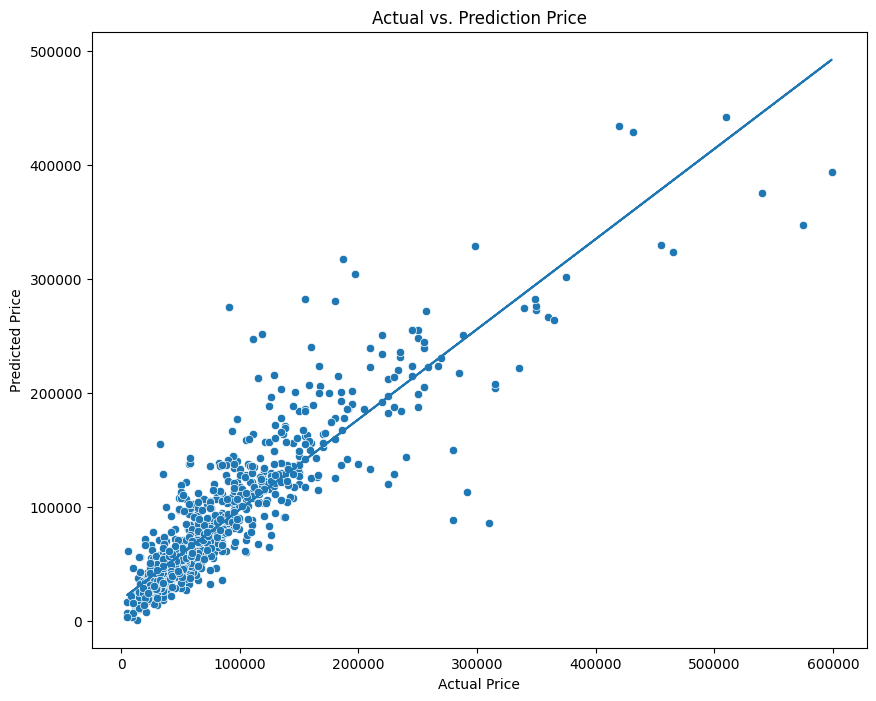

In [828]:
#find line of best fit
a, b = np.polyfit(y_test, y_pred_xgb_tuning_test, 1)

plt.figure(figsize=(10, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning_test
).set(title='Actual vs. Prediction Price',
                                               xlabel='Actual Price',
                                               ylabel='Predicted Price');




#add line of best fit to plot
plt.plot(y_test, a*y_test+b)

- Sebagian besar titik data ada di dekat garis diagonal, menunjukkan bahwa model XGBoost melakukan prediksi yang cukup akurat untuk sebagian besar mobil.
Beberapa outliers terlihat, terutama pada harga mobil yang lebih tinggi, menunjukkan bahwa model masih kesulitan dalam memprediksi harga mobil yang lebih mahal dengan akurasi tinggi. 
- P-value yang besar menunjukkan bahwa tidak ada perbedaan signifikan antara harga aktual dan harga prediksi, yang berarti model XGBoost menghasilkan prediksi yang cukup akurat.

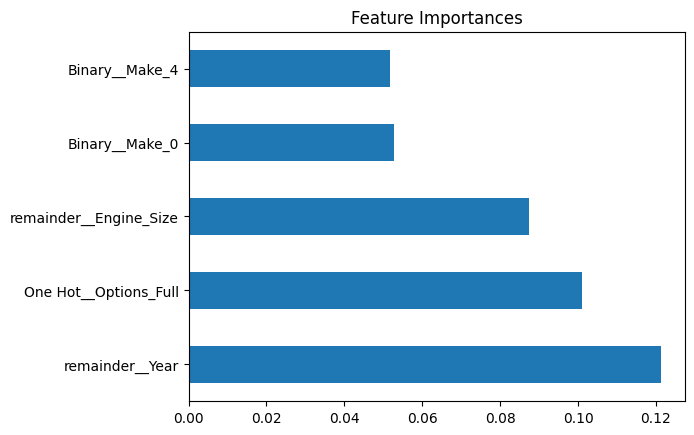

In [829]:
#X = data.drop(['Price'],axis=1)
#carsData1 = pd.DataFrame(transformer.fit_transform(X),columns=transformer.get_feature_names_out())

# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

## **CONCLUSION**


- Fitur Year, Options, Engine_Size dan Mileage adalah fitur yang memiliki pengaruh pada target harga mobil
- Model berhasil terbangun dengan menggunakan beberapa limitasi, yaitu:
    - Rentang Price dimulai dari 5000SAR
    - Rentang Year dimulai dari mobil non-klasik diusia diatas 20 tahun (2002)
- Model ini tidak menutup kemungkinan meleset antara prediksi dan aktual terutama untuk mobil yang harganya tinggi, dikarenaan outliers atas pada target price tidak dihilangka guna kebutuhan untuk bisnis untuk mengikutsertakan mobil dengan harga tinggi untuk diprediksi karena sesuai business
- Adanya indikasi overfitting karena ada perbedaan cukup signifikan antara data latih dan data tes sebelum dan setelah di tuning
- Model yang memiliki performa tertinggi adalah XGBoost dengan menggunakan Eva Metrics RMSE, MAE, dan MAPE dengan nilai Mape setelah tuning 26% dan selisih 
MAE 16823 yang merujuk kepada rata-rata perbedaan prediksi dengan aktual harga, sedangkan Mape dengan nilai 27% masih masuk dalam tahap 'Wajar' pada model XGBoost
- Dapat disimpulkan model yang terpilih dari ketiga model yang dituning adalah **XGBoost**

### RECOMMENDATION

- Melakukan riset lebih dalam mengenai data ini untuk mengetahui Overfiting lebih lanjut untuk dilakukan penanganan yang lebih optimal
- Menganalisa Eror sesuai besarannya dan kemudian dilihat distribusi Error tersebut untuk menganalisa titik error ekstrim.
- Melakukan Feature Engineering lebih jauh untuk memperbaiki performa model
- Penambahan Fitur yang sekianya dapat berkorelasi erat dengan target seperti Miles per Gallon, Tangan keberapa, Warna, dan lainnya
- Apabila memungkinkan, perlu adanya penambahan data dengan informasi yang lebih variatif untuk selanjutnya memungkinkan dibuatkan model yang lebih yang lebih komprehensif yang akan memaksimalkan nilai prediksi


In [ ]:
# Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(data_train, y_train)

# pickle.dump(estimator, open('XGBModel_arabusedcars.sav', 'wb'))

In [ ]:
# Load model
# filename = 'XGBModel_arabusedcars.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(data_test)))